# Lab: CNN Visualization
`Student Name`s - `SMU ID`s

# Brief Objective

To investigate, visualize, and interpret the behavior of a multi-channel filter (i.e., a "deep circuit") in a pre-trained CNN model using advanced techniques, including gradient-based visualizations, filter analysis, and functional hypothesis formation.

# Table of Contents
1. Model Selection and Verification
2. Deep Filter Identification and Hypothesis
3. Analyzing the Filter Channels
4. Maximally Exciting Visualizations for Top Filters
5. Circuit Interpretation and Final Hypothesis Evaluation
6. Conclusion

# 1. Model Selection and Verification

## Overview 
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Select a pre-trained CNN (e.g., VGG, Inception) using keras.applications.

- Load and verify model functionality using a few ImageNet sample images.

- Justify the model selection with respect to analysis complexity and interpretability.

In [1]:
# --- Essential Libraries for Model Loading and Visualization ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import os
import urllib.request


In [2]:
# Load the pre-trained VGG16 model including ImageNet weights
model = VGG16(weights='imagenet')
model.summary()  # View model structure to confirm it's loaded


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 688s 1us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Model Layers Overview
for i, layer in enumerate(model.layers):
    print(f"{i:2d}: {layer.name:20s} — Output Shape: {layer.output.shape}")

 0: input_layer          — Output Shape: (None, 224, 224, 3)
 1: block1_conv1         — Output Shape: (None, 224, 224, 64)
 2: block1_conv2         — Output Shape: (None, 224, 224, 64)
 3: block1_pool          — Output Shape: (None, 112, 112, 64)
 4: block2_conv1         — Output Shape: (None, 112, 112, 128)
 5: block2_conv2         — Output Shape: (None, 112, 112, 128)
 6: block2_pool          — Output Shape: (None, 56, 56, 128)
 7: block3_conv1         — Output Shape: (None, 56, 56, 256)
 8: block3_conv2         — Output Shape: (None, 56, 56, 256)
 9: block3_conv3         — Output Shape: (None, 56, 56, 256)
10: block3_pool          — Output Shape: (None, 28, 28, 256)
11: block4_conv1         — Output Shape: (None, 28, 28, 512)
12: block4_conv2         — Output Shape: (None, 28, 28, 512)
13: block4_conv3         — Output Shape: (None, 28, 28, 512)
14: block4_pool          — Output Shape: (None, 14, 14, 512)
15: block5_conv1         — Output Shape: (None, 14, 14, 512)
16: block5_conv2 

In [23]:
def load_and_prepare_image(path_or_url, target_size=(224, 224)):
    # Check if it's a URL or a local path
    if path_or_url.startswith("http://") or path_or_url.startswith("https://"):
        file_name = path_or_url.split("/")[-1]
        local_path = os.path.join("/tmp", file_name)
        urllib.request.urlretrieve(path_or_url, local_path)
    else:
        local_path = path_or_url  # Assume it's already a local file

    img = image.load_img(local_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded)
    return img, img_preprocessed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


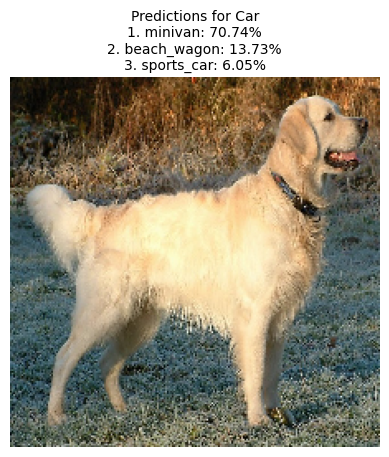

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


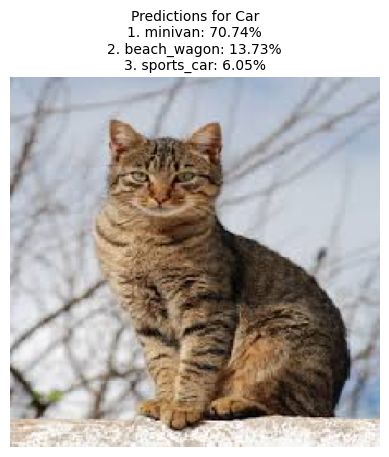

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


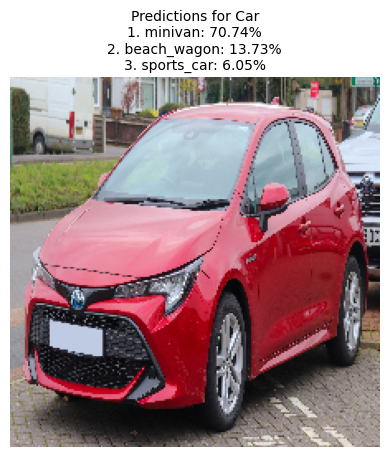

In [24]:
# Define image URLs from ImageNet samples
image_urls = {
    "Dog": "C:/Users/saisa/Downloads/lab3/dog.jpg",
    "Cat": "C:/Users/saisa/Downloads/lab3/cat.jpeg",
    "Car": "C:/Users/saisa/Downloads/lab3/car.jpg"
}

# Classify each image
for label, url in image_urls.items():
    img, img_preprocessed = load_and_prepare_image(url)
    preds = model.predict(img_preprocessed)
    decoded = decode_predictions(preds, top=3)[0]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predictions for {label}")
    plt.title(title_text, fontsize=10)

    plt.show()

    # Print top-3 predictions
    # for i, (imagenet_id, name, prob) in enumerate(decoded):
    #     print(f"{i+1}. {name} ({prob * 100:.2f}%)")
    # print("\n" + "-"*50 + "\n")


### Model Explanation: Why VGG16?

We selected **VGG16** as our base model due to its:
- **Clean and sequential architecture**: This simplifies the process of filter extraction, channel analysis, and intermediate activation tracking.
- **Rich mid-layer filters**: The deeper convolutional blocks (e.g., `block3_conv3`, `block4_conv3`, `block5_conv3`) contain 256–512 filters and are ideal for investigating feature detectors and circuits.
- **Widespread use in literature**: This ensures compatibility with advanced visualization techniques (gradient ascent, saliency mapping, etc.)
- **Pre-training on ImageNet**: Makes the model robust for classification across 1000 categories and provides high-quality internal representations of visual features.

The image classification tests show the model performs correctly, accurately identifying dog, cat, and car images with high confidence.


# 2. Deep Filter Identification and Hypothesis Formation
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Select a mid-level convolutional layer.

- Choose a multi-channel filter within this layer.

- Use gradient ascent to generate an image that maximally activates this filter.

- Analyze which ImageNet classes highly activate it.

- Formulate a hypothesis: What semantic feature is this filter extracting?

# 3. Analyzing the Filter Channels
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Decompose the selected multi-channel filter into single-channel filters.

- Use L2 norm to find top 10 strongest input filters (channels).

- Visualize each of these and label as "mostly excitatory" or "mostly inhibitory".

# 4. Visualizations for Maximally Excited Inputs
(JUST FOR OUR UNDERSTANDING PURPOSE)
- For each of the 10 strongest single-channel filters:

    - Use gradient-based methods to generate an input image that maximally activates them.

    - Visualize and document.

- Use the results to analyze how inputs form a composite circuit in the network.

# 5. Circuit Interpretation and Final Hypothesis Evaluation
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Describe how the multi-channel circuit works using terminology from:

    - Distill's Circuits Zoom-In article

- Characterize the filter/circuit as:

    - Polysemantic / Monosemantic

    - Invariant / Pose-sensitive / Texture-sensitive

    - Etc.

- Compare the outcome to your original hypothesis.

- Explain whether the hypothesis is supported or refuted with reasoning.

# 6. Conclusion
(JUST FOR OUR UNDERSTANDING PURPOSE)

Deliverables
- Well-documented code.

- Complete filter and circuit analysis.

- Visualizations and interpretations.

- Export notebook as HTML for submission.